<table class="m01-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/yy/netsci-course/blob/master/m02-whynetworks/m02_friendship_paradox.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a href="https://github.com/yy/netsci-course/blob/master/m02-whynetworks/m02_friendship_paradox.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View on Github</a>
  </td>
</table>

# Let's examine the friendship paradox with `networkx`

By now you should have a working Juptyer Lab/Notebook and be using Python 3, either through Google Colaboratory or your local Python environment. If not, go back to the previous assignment to make sure that you have a working environment!

To get a good intuitive understanding of the _friendship paradox_, we are going to work through some problems and examples in this notebook. The goal is empirically testing the friendship paradox with multiple types of networks. 

A few tasks will be left to you to complete and submit in your own notebook. Before we dive into creating our own paradox we will go over some basic commands used in the `networkx` library. 

First of all, you can ensure that all results are exactly reproducible by fixing the seed for the random number generator. This is a common technique for checking your computation that involves non-deterministic methods. 

In [3]:
# Please use this random seed for submission.
import random
random.seed(42)     
   
import numpy as np  # noqa: E402
np.random.seed(42)

## Step 1: Using networkx

We are going to start by importing the networkx module:

In [4]:
import networkx as nx

`import xxxxx as xx` is a common way to use widely-used Python libraries. By importing this way, we can use any of the library's classes and functions by prepending the name of the class or function with: 

```
nx.
```

Networkx has extensive documention with many examples. Whenever unsure about the module, go to [the official documentation page](https://networkx.org/documentation/stable/index.html#) and search for the keywords that you are unsure about. In particular, [the official tutorial](https://networkx.org/documentation/stable/tutorial.html) is the best place to learn about the basic usage of `networkx` library. 

Let's start by making a simple undirected graph by hand:

In [5]:
# Creates an instance of a networkx graph.
my_first_graph = nx.Graph() 

# Lets add some nodes to the graph
my_first_graph.add_node(1)
my_first_graph.add_node(2)
my_first_graph.add_node(3)

# Now lets add some connections
my_first_graph.add_edge(1, 2)
my_first_graph.add_edge(3, 2)

We now have our first graph, which contains 3 nodes and 2 edges. We can look at it too by using `draw()` function. By the way, depending on the environment, you may have to import `matplotlib` first (see the `networkx` tutorial). 

`Networkx` is underpowered for network visualization and it is rarely used for any serious network visualization. However, it has basic visualization capacity that is perfectly adequate for examining small networks. 

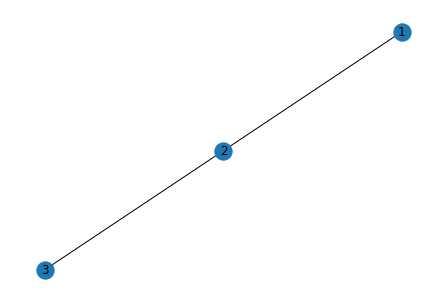

In [6]:
nx.draw(my_first_graph, with_labels=True)

`add_node()` and `add_edge()` are **methods** of the class ```Graph```. Methods are member functions of classes in python and can be called from an object by using the ```.``` notation followed by the method name. We can find out some basic information about this graph using networkx functions and some default python functions:

In [7]:
# len() is a python function that can be applied to any object to obtain their length. 
# networkx defines the number of nodes as the "length" of a graph object. 
len(my_first_graph) 

3

We can also look at the neighbors of a node. 

In [8]:
my_first_graph[2]

AtlasView({1: {}, 3: {}})

In [9]:
my_first_graph.neighbors(2)

Ok. These are not exactly a list, set, or dictionary that you might have expected. `Networkx` uses "views" to let users to examine _read-only_ set- or dictionary-like data structures. For instance, the [`AtlasView`](https://networkx.org/documentation/stable/reference/classes/generated/networkx.classes.coreviews.AtlasView.html) is a "view" of a _dictionary of dictionaries_. Each node may have some attributes (e.g., labels, size, etc.) and they hold these attributes as a dictionary. Therefore, a set of neighbors of a node is a dictionary, where the keys are the neighbor nodes and the values are the attribute dictionary of each node. 

Similarly, calling the `neighbors()` method returns a 'key iterator' of the same dictionary. An iterator yields each successive item. Read about iterators and generators if you are not familiar with them. 

In both cases, you can convert them into a list like the following, 

In [10]:
print(list(my_first_graph[2]))
print(list(my_first_graph.neighbors(2)))

[1, 3]
[1, 3]


Or iterate over the neighbors. 

In [11]:
for node in my_first_graph[2]:
    print(node)

print([node for node in my_first_graph.neighbors(2)])

1
3
[1, 3]


To examine the friendship paradox, we need to also be able to calculate the degree. Once we have the set/list of neighbors, of course we can simply count them. But `networkx` also provides a `degree()` method as well. 

In [12]:
print("Node 2's degree: ", my_first_graph.degree(2))

Node 2's degree:  2


Make sure to review the documentation on both of these functions ([degree](https://networkx.github.io/documentation/stable/reference/classes/generated/networkx.Graph.degree.html) and [neighbors](https://networkx.github.io/documentation/stable/reference/classes/generated/networkx.Graph.neighbors.html)) so you are aware what additional arguments you can give. For instance, degree can take a sequence of nodes as an argument and return a sequence of corresponding degrees.

We can also combine python control statements with `networkx` functions:

In [13]:
# Lets get all the neighbors for each node in the graph
for node in my_first_graph.nodes():
    print("Node", node, "'s neighbors:", set(my_first_graph.neighbors(node)))

Node 1 's neighbors: {2}
Node 2 's neighbors: {1, 3}
Node 3 's neighbors: {2}


This `for` loop iterates over the list returned by the networkx graph method `nodes()`. This graph method returns a list of each node in the network. Similarly, we can loop over edges using `edges()`.

In [14]:
# Quick example of iterating over edges
for edge in my_first_graph.edges():
    print(edge)

(1, 2)
(2, 3)


## Step 2: Friendship paradox extreme examples

Now let's apply some of these tools to the friendship paradox. We will start by using `networkx`'s graph generators to construct a graph for us, then we will calculate the average degree of the network. Once that is done we will calculate the average degree of the neighbors of a few random nodes in the network and compare those values with the degree of the nodes themselves.

The one extreme example is the star network where the friendship paradox is extremely strong. Except the node at the center (the star), all other nodes have only one neighbor who are connected to everyone. 



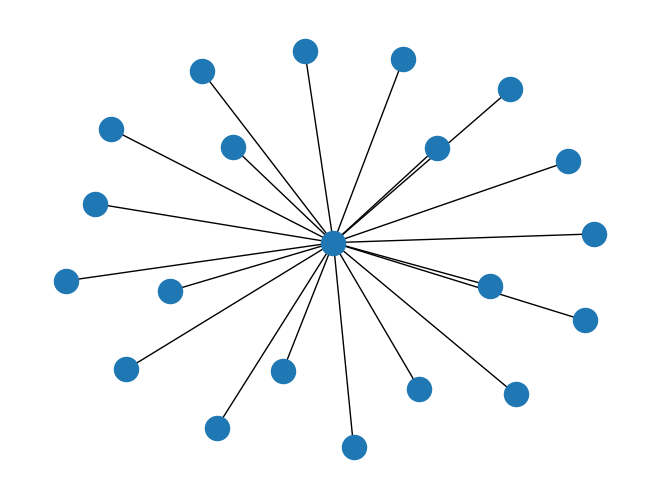

In [6]:
star_graph = nx.star_graph(n=20)
nx.draw(star_graph)

In [16]:
# Lets calculate the average degree of the graph
degree_sum = 0.0
for node in star_graph.nodes():
    degree_sum += star_graph.degree(node)
avg_degree = degree_sum / len(star_graph)
print("Average degree", avg_degree)

Average degree 1.9047619047619047


In [17]:
# Now lets do it in one line using numpy and list comprehension

# Calculate the average degree of the nodes in the graph
avg_degree = np.mean([star_graph.degree(node) for node in star_graph.nodes()])
print("Average degree:",avg_degree)

Average degree: 1.9047619047619047


To calculate the mean, we used [numpy's mean function](http://docs.scipy.org/doc/numpy/reference/generated/numpy.mean.html), which can come in handy for quickly calculating the mean of a list or sequence along an axis. So I passed the list comprehension directly to ```np.mean``` and it returned the mean of that list. 

Note: Numpy uses its own data types for carrying out calculations, so if you print a numpy float it will display differently than if you printed a python float, which is why we get the intentional truncation of the value when displayed.

For basic graph information, networkx used to have an info() function. However, it has been removed in current versions. [info removed](https://networkx.org/documentation/stable/release/api_0.99.html#info)

Good news! You can easily get the same functionality of the old info() function by defining your own.

In [9]:
def info(graph):
    graph_info = "Name:\t\t\t" + star_graph.name
    graph_info += "\nType:\t\t\t" + str(type(star_graph))
    graph_info += "\nNumber of nodes:\t" + str(star_graph.number_of_nodes())
    graph_info += "\nNumber of edges:\t" + str(star_graph.number_of_edges())
    
    return graph_info
    
star_graph.name = "Star Graph"
print(info(star_graph))

Name:			Star Graph
Type:			<class 'networkx.classes.graph.Graph'>
Number of nodes:	21
Number of edges:	20


In [19]:
print(nx.info(star_graph))

Graph with 21 nodes and 20 edges


### Q: Average neighbor degree

Now that you have seen some examples of networkx and numpy, we want you to complete the star graph example by writing a function below that calculates the average degree of a node's neighbors. Test this function to make sure that there is only one node with average neighbor degree of 1 and everyone else has 20. 

This involves find all of a node's neighbors and then taking the average of their degrees. The input arguments into the function should be a node and a networkx graph. The function should return a single value: the average neighbor degree for the given node. You should [learn about how to define and use Python functions](https://www.google.com/search?q=python+function&oq=python+func&aqs=chrome.0.0j69i57j0l4.2723j1j7&sourceid=chrome&ie=UTF-8) if you're not familiar with them yet. Use the space provided below:

In [29]:
def avg_neighbor_degree(G, node):
    # Replace with your code
    pass

# Test your function here


1.0
20.0
20.0
20.0
20.0
20.0
20.0
20.0
20.0
20.0
20.0
20.0
20.0
20.0
20.0
20.0
20.0
20.0
20.0
20.0
20.0


### Q: Testing the friendship paradox

We would like to check whether the friendship paradox holds for a network. The friendship paradox can be described in many different ways. Here, let's determine what fraction of nodes in the graph have a larger average neighbor degree than their own. The larger the fraction, the stronger the effect of the friendship paradox. 

For each node we need to find its degree, then average neighbor degree (calculated with the previous function you made). If the average is greater, then it holds for that node. To get the fraction, we can count up all the nodes it holds for and divide by the total number of nodes. Write a function below that will do this for a graph:

In [35]:
# Replace with your code


0.9523809523809523

Even though the star graph is a fairly trivial example it does display the friendship paradox. It is an extreme case where the average degree of the network is wildly different from the average degree of your neighbors. For all but one node (the center node 0) you have fewer friends than your friends.

You can use the star graph to check if you functions work, since we know it holds in that case.

### Q: The other extreme?

Can you come up with the other extreme? Find a network where there is no friendship paradox whatsoever. In other words, for every node, their degree is the same as the any of its neighbor's degree. Can you do the same thing above to test whether this is really the case?

In [36]:
# Replace with your code

## Step 3: Friendship paradox assignment

Your task is to apply your function to two other types of graphs: a scale-free graph and a random graph. Random graphs are generated from randomly connecting nodes together, with each node having the same probability of being connected to any other node. They don't have much structure to them. Below is a visualization of a random graph:

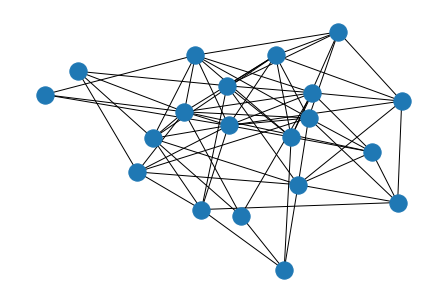

In [37]:
# Draw a random graph with 20 nodes and a connection
# probability of 0.3
rnd_graph = nx.erdos_renyi_graph(n=20, p=0.3)
nx.draw(rnd_graph)

Alternatively, scale-free graphs are graphs where nodes are preferentially attached to nodes with higher degree. This results in structures called 'hubs' which are nodes that have very high degree. Below is a visualization of one such network:

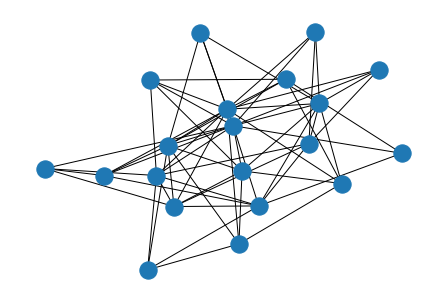

In [39]:
# Draw a scale-free graph with 20 nodes
sf_graph = nx.barabasi_albert_graph(n=20, m=4)
nx.draw(sf_graph)

Unlike in the random graph where nodes tend to have comparable degrees that are situated pretty close to the average, the scale-free graph has many low degree nodes and a few very high degree nodes which we can see in the figure above. Many social networks tend to have this hub-like structure. We will be testing out the friendship paradox on both types of networks.

You can use networkx's generator functions for making the [scale-free graph](https://networkx.github.io/documentation/stable/reference/generated/networkx.generators.random_graphs.barabasi_albert_graph.html) and the [random graph](https://networkx.github.io/documentation/stable/reference/generated/networkx.generators.random_graphs.erdos_renyi_graph.html). 

### Q: Scale-free graph
For the scale-free graph use the parameters ```n=200``` and ```m=3```. You should answer the following questions:

#### 1. What is the average degree of the graph?

#### 2. What fraction of nodes in the graph have a larger average neighbor degree than their degree?

#### 3. Did the friendship paradox occur in the scale-free graph? If so, why did it? If not, why not? (provide your response in the markdown cell below)

Field for text entry

### Q: Random graph

For the erdos-renyi graph use the parameters ```n=200``` and ```p=0.2```.

#### 1. What is the average degree of the graph?

#### 2. What fraction of nodes in the graph have a larger average neighbor degree than their degree?

#### 3. Did the friendship paradox occur in the random graph? If so, why did it? If not, why not?

Field for text entry

**Rename your notebook as 'friendship_lastname_firstname'. Export it as an HTML file as well. Upload both to Canvas.**

# Optional exercise

Above, we compared the node's degree with the _average degree of its neighbors_. But we can also ask: what's the probability that a _random neighbor of a randomly chosen node_ has a larger degree than the randomly chosen node? Can you test this? 

Also, we have only examined model networks. How about real networks? There are several repositories of real-world networks. For instance,

- https://icon.colorado.edu
- https://networks.skewed.de 

It may be fun to test how many networks you can find that have the friendship paradox!